In [33]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
df_woe = pd.read_csv('../data/processed/df_woe.csv')

In [50]:
df_woe

,Var_01_woe,Var_02_woe,Var_03_woe,Var_04_woe,Var_05_woe,Var_06_woe,Var_07_woe,Var_08_woe,Var_09_woe,Var_10_woe,...,Var_31_woe,Var_32_woe,Var_33_woe,Var_34_woe,Var_35_woe,Var_36_woe,Var_37_woe,Var_38_woe,Var_39_woe,default
0,1.602029,2.161178,1.601304,-0.242243,0.050486,2.558108,-0.096086,1.927932,2.507456,3.059200,...,0.663223,1.725419,-0.000282,3.066939,0.119413,1.722072,-0.090043,1.529446,0.435364,0
1,1.989977,2.161178,2.382690,-0.242243,0.050486,2.558108,-0.096086,2.747950,2.507456,3.059200,...,0.663223,1.725419,-0.000282,3.066939,0.119413,1.722072,-0.090043,1.529446,2.381269,1
2,1.989977,2.161178,1.172870,-0.242243,0.050486,2.558108,-0.096086,2.747950,2.507456,2.288942,...,0.178431,1.725419,-0.247608,2.305629,-0.065835,1.722072,-0.090043,1.822981,0.435364,0
3,1.989977,2.161178,1.172870,-0.242243,-0.128911,2.558108,-0.096086,2.747950,2.507456,2.288942,...,0.178431,1.725419,-0.000282,2.305629,-0.065835,1.722072,-0.090043,1.822981,0.435364,1
4,1.989977,1.785738,2.382690,-0.242243,-0.467310,1.559653,-0.096086,1.927932,1.907468,1.900164,...,-0.787109,2.743854,-0.247608,1.906589,-0.065835,2.906220,-0.311843,1.822981,2.381269,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125753,1.602029,1.508321,1.601304,-0.242243,0.044977,-2.377479,-0.096086,1.927932,1.907468,1.900164,...,-0.787109,1.849329,-0.247608,1.906589,-0.065835,1.859636,-0.311843,1.822981,2.381269,0
125754,1.602029,1.508321,1.601304,-0.242243,0.218554,-0.704081,-0.096086,1.213114,1.293746,1.567715,...,-0.787109,1.053915,-0.247608,1.573936,-0.231364,1.053113,-0.090043,1.822981,1.788023,0
125755,-2.744596,-8.788252,-2.027166,0.001806,-0.467310,-2.377479,-0.096086,-2.905559,-3.122933,-3.475616,...,-0.787109,-2.063711,-0.247608,-3.409683,-0.065835,-2.072218,0.091239,-2.049761,-2.721174,0
125756,-2.744596,-8.788252,-2.027166,-0.242243,-0.467310,-2.377479,-0.096086,-2.905559,-3.122933,-3.475616,...,-0.787109,-2.063711,-0.247608,-3.409683,-0.231364,-2.072218,-0.311843,-2.049761,-2.721174,0


In [51]:
cols_to_drop = ['Var_02_woe', 'Var_01_woe', 'Var_11_woe', 'Var_18_woe', 'Var_29_woe', 'Var_36_woe', 'Var_34_woe', 'Var_22_woe', 'Var_12_woe', 'Var_16_woe', 'Var_19_woe', 'Var_30_woe', 'Var_09_woe', 'Var_21_woe', 'Var_17_woe', 'Var_14_woe', 'Var_26_woe', 'Var_32_woe', 'Var_39_woe', 'Var_24_woe', 'Var_06_woe', 'Var_38_woe', 'Var_10_woe', 'Var_20_woe']

df_woe2 = df_woe.drop(cols_to_drop, axis=1)

In [52]:
# Split the data into training and testing sets
X = df_woe2.drop('default', axis=1)  # Features
y = df_woe2['default']               # Target variable

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a RandomForestClassifier object
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X, y=y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to view the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

In [53]:
feature_importance_df['Feature'].values

array(['Var_03_woe', 'Var_08_woe', 'Var_25_woe', 'Var_04_woe',
       'Var_31_woe', 'Var_15_woe', 'Var_05_woe', 'Var_28_woe',
       'Var_27_woe', 'Var_37_woe', 'Var_13_woe', 'Var_35_woe',
       'Var_33_woe', 'Var_23_woe', 'Var_07_woe'], dtype=object)

In [54]:
var_dict = {'Var_03_woe': 'Cash And Cash Equivalents', 
            'Var_08_woe': 'Earnings Before Interest And Tax', 
            'Var_25_woe': 'Quick Ratio', 
            'Var_04_woe': 'Current Ratio',
            'Var_31_woe': 'Sales / Total Assets', 
            'Var_15_woe': 'Gross Profit Margin', 
            'Var_05_woe': 'Debt / Net Worth', 
            'Var_28_woe': 'Return On Total Equity Reserve',
            'Var_27_woe': 'Return On Assets', 
            'Var_37_woe': 'Total Net Debt EBITDA', 
            'Var_13_woe': 'Financial Leverage', 
            'Var_35_woe': 'Total Liabilities / Total Assets',
            'Var_33_woe': 'Senior Net Debt', 
            'Var_23_woe': 'Net Profit Margin', 
            'Var_07_woe': 'EBITDA Margin'
            }

In [55]:
# change the feature names to the actual variable names
feature_importance_df['Feature'] = feature_importance_df['Feature'].map(var_dict)

In [56]:
feature_importance_df

,Feature,Importance
0,Cash And Cash Equivalents,0.207439
4,Earnings Before Interest And Tax,0.187022
8,Quick Ratio,0.093006
1,Current Ratio,0.081157
11,Sales / Total Assets,0.068532
6,Gross Profit Margin,0.057077
2,Debt / Net Worth,0.047390
10,Return On Total Equity Reserve,0.046839
9,Return On Assets,0.038900
14,Total Net Debt EBITDA,0.035139


## make dictionary and change

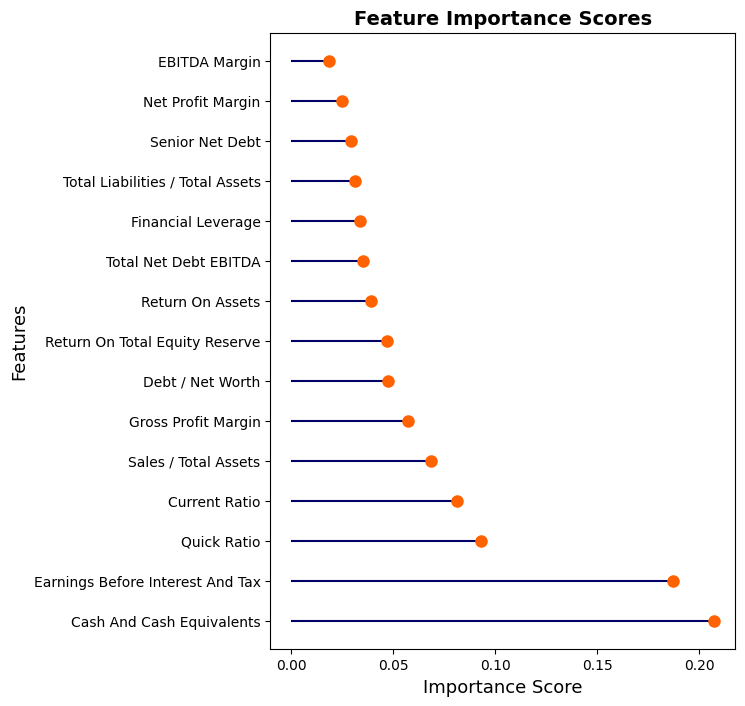

In [57]:
# Creating the vertical plot
plt.figure(figsize=(6, 8))  # Adjust the figure size appropriately
plt.hlines(y=feature_importance_df['Feature'], xmin=0, xmax=feature_importance_df['Importance'], color='#000066')  # Horizontal lines for lollipops
plt.plot(feature_importance_df['Importance'], feature_importance_df['Feature'], 'o', markersize=8, color='#ff6200')  # Red dots for each lollipop head
plt.title('Feature Importance Scores', fontsize=14, fontweight='bold')  # Add a title
plt.xlabel('Importance Score', fontsize=13)  # Label the x-axis
plt.ylabel('Features', fontsize=13)  # Label the y-axis
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')

plt.show()